# Achievement 4 Project Charts

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
path =r'Desktop/CF/Achievement 4/Instacart Basket Analysis/02 Data/Prepared Data/410_6.pkl'

In [26]:
path_orig = r'Desktop/CF/Achievement 4/Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path))

In [4]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'


In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,orders_days_since_order,product_id,add_to_cart_order,reordered,product_name,...,Dependants,Marital_Status,income,_merge,Region_flag,Activity,Age_Income_profile,Family_profile,User_profile,price_range_loc
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,3,married,40423,both,South,10,Low Income Adult,with kids,married Low Income Adult with kids,Mid-range product
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,both,South,10,Low Income Adult,with kids,married Low Income Adult with kids,Mid-range product
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,both,South,10,Low Income Adult,with kids,married Low Income Adult with kids,Mid-range product
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,both,South,10,Low Income Adult,with kids,married Low Income Adult with kids,Mid-range product
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,both,South,10,Low Income Adult,with kids,married Low Income Adult with kids,Mid-range product


In [13]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
orders_day_of_week             0
order_hour_of_day              0
orders_days_since_order        0
product_id                     0
add_to_cart_order              0
reordered                      0
product_name               26972
aisle_id                       0
department_id                  0
prices                      4877
max_order                      0
loyalty_flag                   0
Average_order                  0
Spending_flag                  0
median_order                   0
Frequency_flag                 0
First Name                     0
Last Name                      0
Gender                         0
State                          0
Age                            0
date_joined                    0
Dependants                     0
Marital_Status                 0
income                         0
_merge                         0
Region_flag                    0
Activity  

In [15]:
df.dropna(subset = ['product_name'], inplace = True)

In [16]:
df.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
orders_day_of_week            0
order_hour_of_day             0
orders_days_since_order       0
product_id                    0
add_to_cart_order             0
reordered                     0
product_name                  0
aisle_id                      0
department_id                 0
prices                     4877
max_order                     0
loyalty_flag                  0
Average_order                 0
Spending_flag                 0
median_order                  0
Frequency_flag                0
First Name                    0
Last Name                     0
Gender                        0
State                         0
Age                           0
date_joined                   0
Dependants                    0
Marital_Status                0
income                        0
_merge                        0
Region_flag                   0
Activity                      0
Age_Inco

In [17]:
df_null = df.loc[df['prices'].isnull()]

In [19]:
df_null['prices']

7816       NaN
7817       NaN
15172      NaN
20294      NaN
20528      NaN
            ..
32333017   NaN
32333018   NaN
32333019   NaN
32337105   NaN
32340034   NaN
Name: prices, Length: 4877, dtype: float64

In [20]:
df.dropna(subset = ['prices'], inplace = True)

In [21]:
df.isnull().sum()

order_id                   0
user_id                    0
order_number               0
orders_day_of_week         0
order_hour_of_day          0
orders_days_since_order    0
product_id                 0
add_to_cart_order          0
reordered                  0
product_name               0
aisle_id                   0
department_id              0
prices                     0
max_order                  0
loyalty_flag               0
Average_order              0
Spending_flag              0
median_order               0
Frequency_flag             0
First Name                 0
Last Name                  0
Gender                     0
State                      0
Age                        0
date_joined                0
Dependants                 0
Marital_Status             0
income                     0
_merge                     0
Region_flag                0
Activity                   0
Age_Income_profile         0
Family_profile             0
User_profile               0
price_range_lo

## Price Range Bar

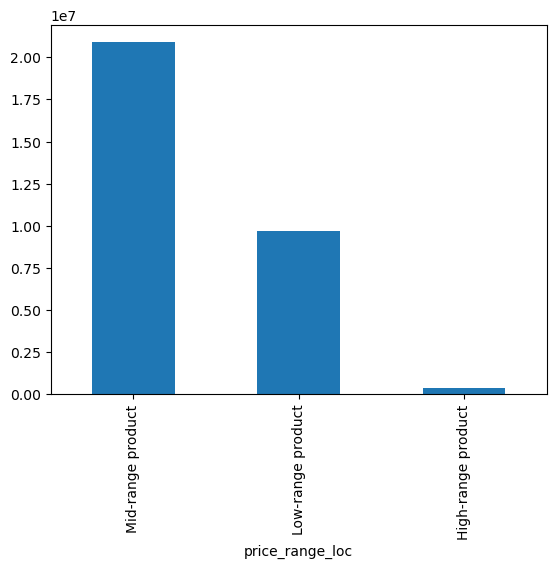

In [24]:
bar1 = df['price_range_loc'].value_counts().plot.bar()

In [28]:
bar1.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'bar_Pr_loc.png'))

## Department ID Bar

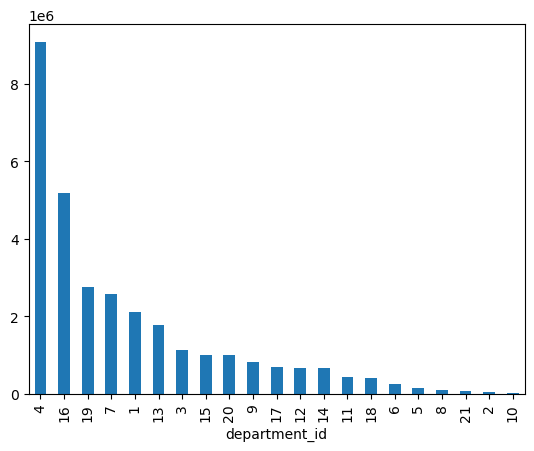

In [32]:
bar2 = df['department_id'].value_counts().plot.bar()

In [33]:
bar2.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'bar_dp.png'))

## Department ID Hist 

AttributeError: 'Axes' object has no attribute 'xtick'

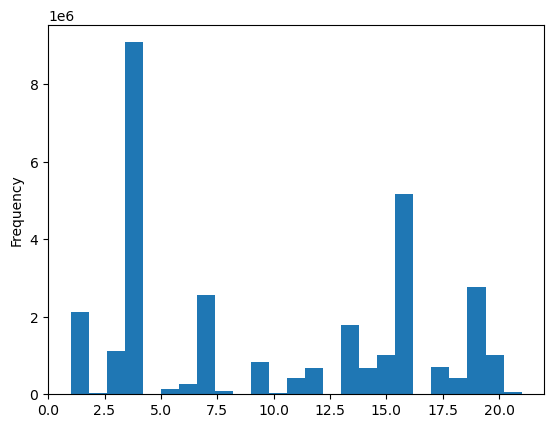

In [47]:
hist= df['department_id'].plot.hist(bins = 25).xtick('department_id')

In [50]:
crosstab = pd.crosstab(df['Spending_flag'], df['Frequency_flag'], dropna = False)

In [51]:
crosstab

Frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Spending_flag,,,
High Spender,435335,39874,124076
Low Spender,21768602,2148093,6444835


In [87]:
agg_crosstab = df.groupby(['loyalty_flag', 'Frequency_flag'])['Frequency_flag'].value_counts().unstack().fillna(0)

## Loyalty Flag and Frequency flag Stacked bar

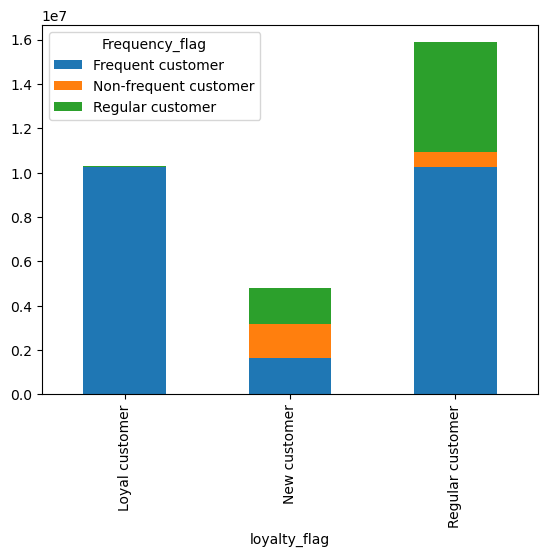

In [88]:
st_bar1 = agg_crosstab.plot(kind='bar', stacked=True)

In [78]:
st_bar1.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'st_bar_1.png'))

In [59]:
Region_Agg = df.groupby(['Region_flag', 'loyalty_flag'])['loyalty_flag'].value_counts().unstack().fillna(0)

## Region Flag and Loyalty Flag Stacked bar chart

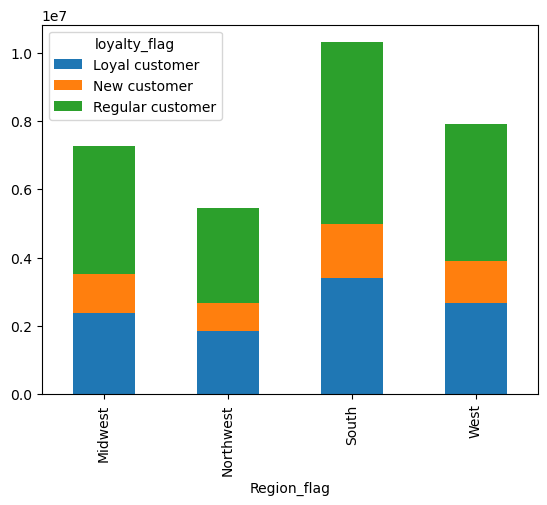

In [63]:
stacked1 =Region_Agg.plot(kind='bar', stacked=True)

In [79]:
stacked1.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'st_bar_2.png'))

In [61]:
Region_Agg2 = df.groupby(['Region_flag', 'Spending_flag'])['Spending_flag'].value_counts().unstack().fillna(0)

## Region Flag and Spending flag stacked bar

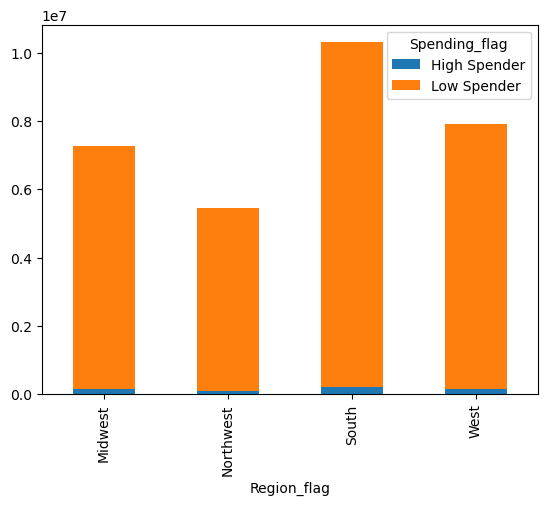

In [64]:
stacked2= Region_Agg2.plot(kind='bar', stacked=True)

In [80]:
stacked2.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'st_bar_3.png'))

In [68]:
Region_Agg3 = df.groupby(['User_profile', 'Region_flag'])['Region_flag'].value_counts().unstack().fillna(0)

## User profile and Region flag Stacked bar chart

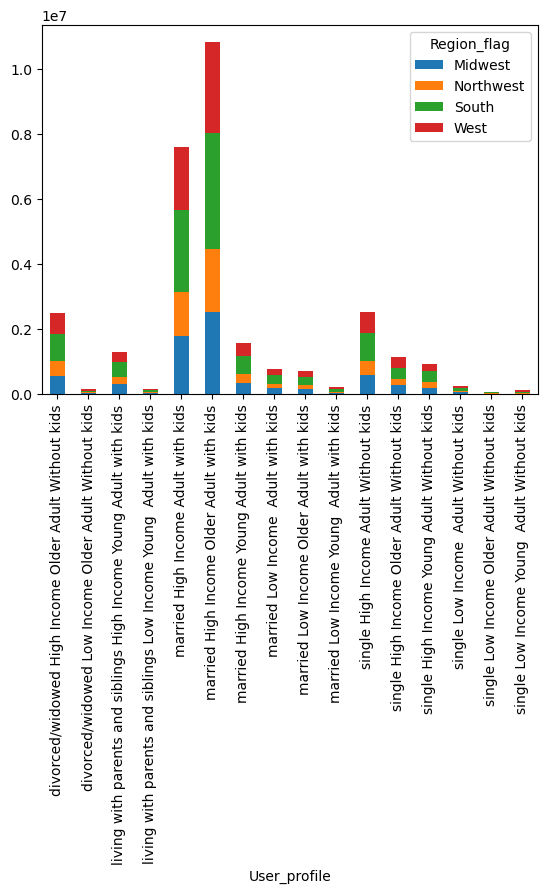

In [69]:
stacked3= Region_Agg3.plot(kind='bar', stacked=True)

In [81]:
stacked3.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'st_bar_4.png'))

## User Profile value counts Bar chart

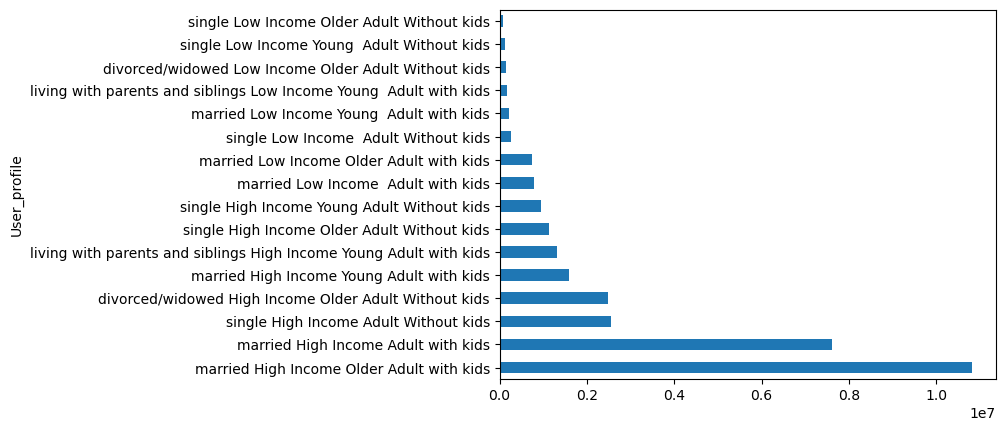

In [76]:
bar3 = df['User_profile'].value_counts().plot.barh()

In [82]:
bar3.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'st_bar_4.png'))

## Region Flag and Frequency Flag Stacked bar chart

In [97]:
Region_Agg5 = df.groupby(['Region_flag', 'Frequency_flag'])['Frequency_flag'].value_counts().unstack().fillna(0)

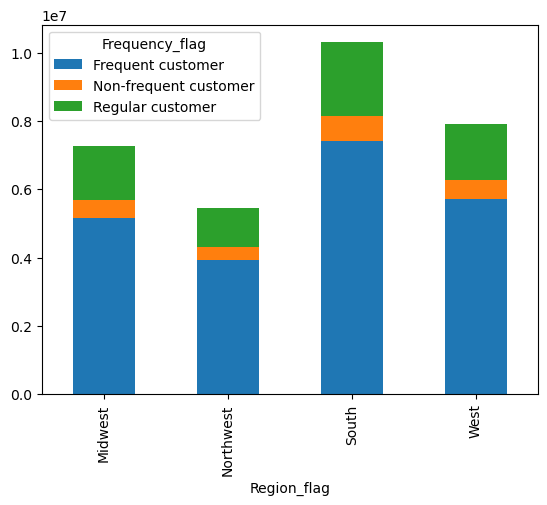

In [98]:
Region_Agg5 =Region_Agg5.plot(kind='bar', stacked=True)

In [93]:
Region_Agg2

[]

## Loyalty Flag bar chart

<Axes: xlabel='loyalty_flag'>

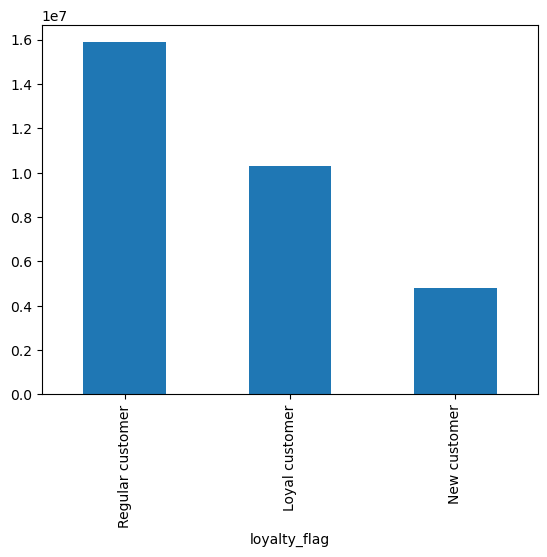

In [99]:
df['loyalty_flag'].value_counts().plot.bar()

## Age and Proces line chart

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


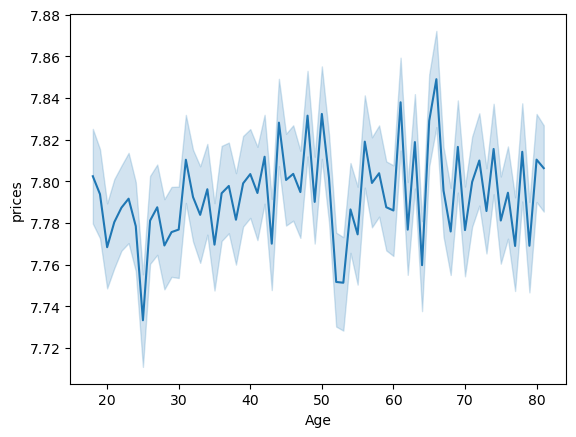

In [105]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7
big = df[dev]
small = df[~dev]
df_2 = small[['Age','prices']]
line = sns.lineplot(data = df_2, x = 'Age',y = 'prices')



## User Profile and Loyalty Flag Stacked Bar Chart

In [114]:
Region_Agg6 = df.groupby(['User_profile', 'loyalty_flag'])['loyalty_flag'].value_counts().unstack().fillna(0)

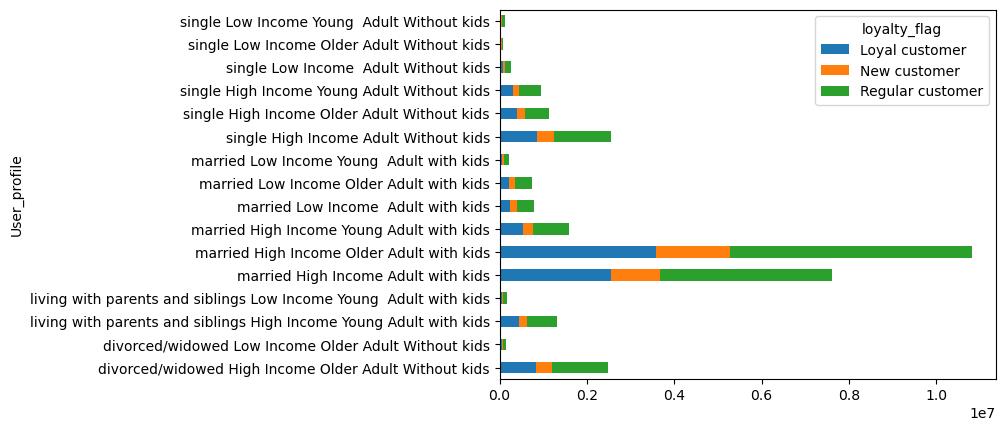

In [115]:
Region_Agg6 =Region_Agg6.plot(kind='barh', stacked=True)

In [ ]:
bar3.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'st_bar_4.png'))

In [129]:
Region_Agg7 = df.groupby(['loyalty_flag', 'Marital_Status'])['Marital_Status'].value_counts().unstack().fillna(0)

## Loyalty Flag and Marital Status Stacked Bar chart

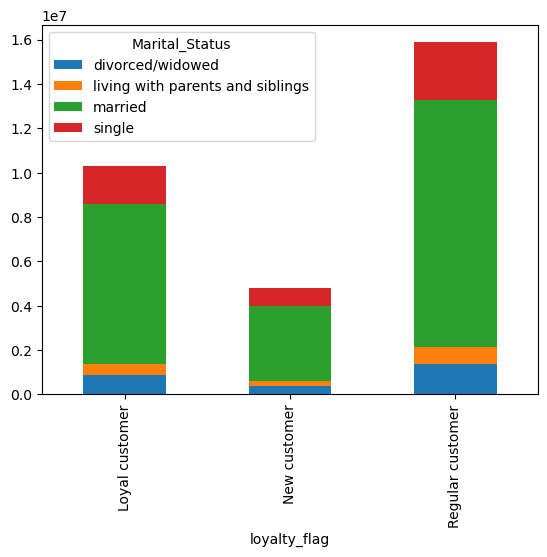

In [130]:
Region_Agg7 =Region_Agg7.plot(kind='bar', stacked=True)

## Frequency flag Marital Status Stacked Bar Chart

In [132]:
Region_Agg8 = df.groupby(['Frequency_flag', 'Marital_Status'])['Marital_Status'].value_counts().unstack().fillna(0)

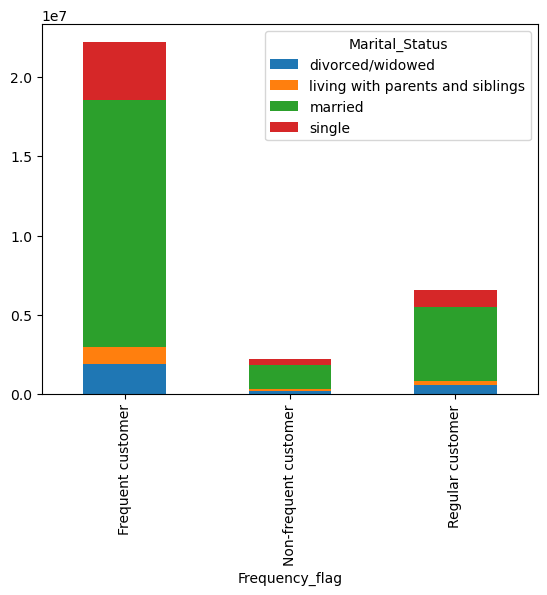

In [133]:
Region_Agg8 =Region_Agg8.plot(kind='bar', stacked=True)